**一 SVM简单介绍** 

支持向量机(Support Vector Machine，SVM)是Corinna Cortes和Vapnik等于1995年首先提出的，它在解决小样本、非线性及高维模式识别中表现出许多特有的优势，并能够推广应用到函数拟合等其他机器学习问题中。 在机器学习中，支持向量机是与相关的学习算法有关的监督学习模型，可以分析数据、识别模式，用于分类和回归分析。

**二 函数间隔与几何间隔**  

对一个数据点进行分类，当超平面离数据点的“间隔”越大，分类的确信度（confidence）也越大。所以，为了使得分类的确信度尽量高，需要让所选择的超平面能够最大化这个“间隔”值。这个间隔就是下图中的Gap的一半。
![2.png](image/2.png)



**2.1 函数间隔**<br>
定义函数间隔为：
$$\hat\gamma=y(w^Tx+b)=yf(x)$$
而超平面(w，b)关于T中所有样本点($x_i$，$y_i$)的函数间隔最小值（其中，x是特征，y是结果标签，i表示第i个样本），便为超平面(w, b)关于训练数据集T的函数间隔。 但这样定义的函数间隔有问题，即如果成比例的改变w和b（如将它们改成2w和2b），则函数间隔的值f(x)却变成了原来的2倍（虽然此时超平面没有改变），所以只有函数间隔还不够，我们要引入几何间隔。
![1.png](image/1.png) 

**2.2 几何间隔**<br>
在几何学里，点($x_i$，$y_i$)到直线$ax+by+c=0$的距离公式:
$$d(x_i, y_i) = \frac{|ax_i+by_i+c|}{\sqrt{a^{2}+b^{2}}}$$
所以在二维空间中，几何间隔就是点到直线的距离；在三维空间中，几何间隔是点到空间上一平面的距离；而在SVM中，平面变成了超平面，几何间隔便是样本点到超平面的距离：
$$\gamma_{i}=y_{i}(\frac{w^T}{\Vert w\Vert}x_{i}+\frac{b}{\Vert w\Vert})$$



**三 最大间隔分类器**  


如下图所示，中间的实线便是寻找到的最优超平面（Optimal Hyper Plane），其到两条虚线边界的距离相等，虚线边界上的点到最优超平面的距离便是几何间隔，两条虚线间隔边界之间的距离等于2倍的几何间隔，而虚线间隔边界上的点则是支持向量。而对于所有不是支持向量的点，有如下关系：
$y(w^Tx+b)>1$
![3.png](image/3.png)

函数间隔不适合用来最大化间隔值，因为在超平面固定以后，可以等比例地缩放w的长度和b的值，这样可以使得的值任意大，亦即函数间隔可以在超平面保持不变的情况下被取得任意大。但几何间隔因为除上了${\Vert w\Vert}$，使得在缩放w和b的时候几何间隔的值是不会改变的，它只随着超平面的变动而变动，因此，这是更加合适的一个间隔。换言之，这里要找的最大间隔分类超平面中的“间隔”指的是几何间隔。 于是最大间隔分类器（maximum margin classifier）的目标函数可以定义为： 同时需满足一些条件，根据间隔的定义，有
$$y_i(w^Tx_i+b)=\hat\gamma_i>=\hat\gamma,i=1,2,...,n$$
距离超平面最近的这几个训练样本点使得等式成立，它们被称为**支持向量**，这些支持向量到到超平面的距离是$\frac{1}{w}$
从而上述目标函数转化成了：
$$max\frac{1}{\Vert w\Vert},s.t.\ y_i(w^Tx_i+b)>=1,i=1,2,...,n$$

相当于在相应的约束条件下，最大化这个$\frac{1}{\Vert w\Vert}$值，而$\frac{1}{\Vert w\Vert}$便是要求解的几何间隔。

**通过以上的介绍，我们得出支持向量机的目标函数，但往往这个问题不是那么容易解决，所以需要将其转化为其对偶形式求解，往往对对偶形式求解会比直接对原问题求解方便很多。**

**四 原始问题到对偶问题的求解**   

接着考虑之前得到的目标函数：
$$max\frac{1}{\Vert w\Vert}$$ $$s.t.\ y_i(w^Tx_i+b)>=1,i=1,2,...,n$$
由于求$\frac{1}{\Vert w\Vert}$的最大值相当于求${\Vert w\Vert}$的最小值，也相当于求$\frac{1}{2}{\Vert w\Vert}^2$的最小值，所以上述目标函数等价于：
$$min\frac{1}{2}{\Vert w\Vert}^2$$ $$s.t.\ y_i(w^Tx_i+b)>=1,i=1,2,...,n$$

此外，由于这个问题的特殊结构，还可以通过拉格朗日对偶性（Lagrange Duality）变换到对偶变量 (dual variable) 的优化问题，即通过求解与原问题等价的对偶问题（dual problem）得到原始问题的最优解，这就是线性可分条件下支持向量机的对偶算法，这样做的优点在于：一者对偶问题往往更容易求解；二者可以自然的引入核函数，进而推广到非线性分类问题。 那什么是拉格朗日对偶性呢？简单来讲，通过给每一个约束条件加上一个**拉格朗日乘子**（Lagrange multiplier），定义拉格朗日函数（通过拉格朗日函数将约束条件融合到目标函数里去，从而只用一个函数表达式便能清楚的表达出我们的问题）：
$$L\left(w,b,\alpha\right)=\frac{1}{2}{\Vert w\Vert}^2-\sum_{i=1}^{n}\alpha_i{\lgroup}y_i\left(w^Tx_i+b\right)-1\rgroup$$
然后令：
$$\theta\left(w\right)=max\ L\left(w,b,\alpha\right),\alpha_i>=0$$  

容易验证，当某个约束条件不满足时，例如$y_i\left(w^Tx_i+b\right)<1$，那么显然有$\theta\left(w\right)=\infty$（只要令$\alpha_i=\infty$即可）。而当所有约束条件都满足时，则最优值为$\theta\left(w\right)=\frac{1}{2}{w}^2$，亦即最初要最小化的量。 因此，在要求约束条件得到满足的情况下最小化$\frac{1}{2}{w}^2$，实际上等价于直接最小化$\theta\left(w\right)$（当然，这里也有约束条件，就是$\alpha_i>=0,i=1,...,n)$，因为如果约束条件没有得到满足，会等于无穷大，自然不会是我们所要求的最小值。 具体写出来，目标函数变成了：
$$\min\limits_{w,b}\theta\left(w\right)=\min\limits_{w,b}                              \max\limits_{\alpha_i>=0}L\left(w,b,\alpha\right)=p^*$$
这里用$p^*$表示这个问题的最优值，且和最初的问题是等价的。如果直接求解，那么一上来便得面对w和b两个参数，而又是不等式约束，这个求解过程不好做。不妨把最小和最大的位置交换一下，变成：
$$\max\limits_{\alpha_i>=0}\min\limits_{w,b}L\left(w,b,\alpha\right)=d^*$$

交换以后的新问题是原始问题的对偶问题，这个新问题的最优值用来$d^*$来表示。而且有$d^*≤p^*$，在满足某些条件的情况下，这两者相等，这个时候就可以通过求解对偶问题来间接地求解原始问题。  

换言之，之所以从min max的原始问题$p^*$，转化为max min的对偶问题$d^*$，一者因为是近似解，二者，转化为对偶问题后，更容易求解。 下面可以先求L对w、b的极小，再求L对$\alpha$的极大。


**五 对偶问题的求解**  

$$L\left(w,b,\alpha\right)=\frac{1}{2}{\Vert w\Vert}^2-\sum_{i=1}^{n}\alpha_i{\lgroup}y_i\left(w^Tx_i+b\right)-1\rgroup$$

首先固定$\alpha$,要让L关于w和b最小化，我们分别对w,b求偏导数，即令：

$$\frac{\partial{L}}{\partial{w}}=0$$
$$\frac{\partial{L}}{\partial{b}}=0$$

$$\frac{\partial{L}}{\partial{w}}=0\Rightarrow \parallel w \parallel =\sum_{i=1}^{n}\alpha_iy_ix_i$$
$$\frac{\partial{L}}{\partial{b}}=0\Rightarrow\sum_{i=1}^{n}\alpha_iy_i=0$$
将以上结果带入之前的$L\left(w,b,\alpha\right)$：
$$L(w,b,\alpha)=\frac{1}{2}{w}^2-\sum_{i=1}^{n}\alpha_i{\lgroup}y_i\left(w^Tx_i+b\right)-1{\rgroup}$$

得到：
$$L(w,b,\alpha)=\frac{1}{2}\sum_{i,j=1}^{n}\alpha_i\alpha_jy_iy_j{x_i}^Tx_j-\sum_{i,j=1}^{n}\alpha_i\alpha_jy_iy_j{x_i}^Tx_j-b\sum_{i=1}^{n}\alpha_iy_i+\sum_{i=1}^{n}\alpha_i=\sum_{i=1}^{n}\alpha_i-\frac{1}{2}\sum_{i,j=1}^{n}\alpha_i\alpha_j{y_iy_j{x_i}^Tx_j}$$

求对$\alpha$的极大，即是关于对偶问题的最优化问题。经过上面一个步骤的求w和b，得到的拉格朗日式子已经没有了变量w,b，只有$\alpha$。从上面的式子得到：
$$\max\limits_{\alpha}\sum_{i=1}^{n}\alpha_i-\frac{1}{2}\sum_{i,j=1}^{n}\alpha_i\alpha_jy_iy_j{x_i}^Tx_j$$
$$s.t.,\alpha_i>=0,i=1,...,n$$
$$\sum_{i=1}^{n}\alpha_iy_i=0$$

这样，求出了$\alpha_i$，根据:$$w=\sum_{i=1}^{n}\alpha_iy_ix_i$$
即可求出w，然后通过
$$b^*=-\frac{\max_{i:y^i = -1}w^Tx^i+\min_{i:y^i = 1}w^Tx^i}{2}$$
即可求出b，最终得出分离超平面和分类决策函数。  


在求得$L(w,b,\alpha)$关于w和b最小化，以及对$\alpha$的极大之后，最后一步可以利用SMO算法求解对偶问题中的拉格朗日乘子$\alpha$。




**在我们刚开始讨论支持向量机时，我们就假定数据是线性可分的，也就是我们可以找到一个可行的超平面将数据完全分开。但是如果数据有噪音，而不是因为数据本身不是非线性结构。对于这种偏离正常位置很远的数据点，我们称之为outlier。**

**五 使用松弛变量处理outliers方法**  

在原先的SVM模型中，outlier的存在可能造成很大的影响，因为超平面本身就是只有少数几个support vector组成，如果这些support vector里又存在outlier的话，其影响就很大了。例如下图：
![4.png](image/4.png)

用黑圈圈起来的那个蓝点是一个 outlier ，它偏离了自己原本所应该在的那个半空间，如果直接忽略掉它的话，原来的分隔超平面还是挺好的，但是由于这个 outlier 的出现，导致分隔超平面不得不被挤歪了，变成途中黑色虚线所示（这只是一个示意图，并没有严格计算精确坐标），同时 margin 也相应变小了。当然，更严重的情况是，如果这个 outlier 再往右上移动一些距离的话，我们将无法构造出能将数据分开的超平面来。  

为了处理这种情况，SVM 允许数据点在一定程度上偏离一下超平面。例如上图中，黑色实线所对应的距离，就是该 outlier 偏离的距离，如果把它移动回来，就刚好落在原来的超平面蓝色间隔边界上，而不会使得超平面发生变形了。  

我们原来的约束条件变成了：
$$y_i(w^Tx_i+b)>=1,i=1,...,n$$
现在考虑outlier的问题，约束条件变成了：
$$y_i(w^Tx_i+b)>=1-\varepsilon_i,i=1,...n$$

其中$\varepsilon_i>=0$称为松弛变量，对应数据点$x_i$允许偏离的function margin的量。当然，如果我们运行$\varepsilon_i$任意大的话，那任意的超平面都是符合条件的了。所以，我们在原来的目标函数后面加上一项，使得这些$\varepsilon_i$的总和也要最下：
$$\min\frac{1}{2}{\parallel w\parallel}^2+C\sum_{i=1}^{n}\varepsilon_i$$

其中C是一个参数，用于控制目标函数中两项(“寻找margin最大的超平面和保证数据点偏差量最小”）之间的权重。注意，其中$\varepsilon$是需要优化的变量之一，而C是一个事先确定好的常量。完整地写出来是这个样子：
$$\min\frac{1}{2}{\parallel w\parallel}^2+C\sum_{i=1}^{n}\varepsilon_i$$
$$s.t\ y_i(w^Tx_i+b)>=1-\varepsilon_i,i=1,...n$$
$$\varepsilon_i>=0,i=1,...,n$$

用之前的方法将约束条件加入到目标函数中，得到的新的拉格朗日函数，如下所示：
$$L(w,b,\varepsilon,\alpha,\gamma)=\frac{1}{2}{\parallel w\parallel}^2+C\sum_{i=1}^{n}\varepsilon_i-\sum_{i=1}^{n}\alpha_i{\lgroup}y_i\left(w^Tx_i+b\right)-1+\varepsilon_i\rgroup-\sum_{i=1}^{n}\gamma_i\varepsilon_i$$

分析方法和前面一样，转换为另一个问题后，我们先让L针对$w,b和\varepsilon$最小化：
$$\frac{{\partial}L}{\partial w}=0\Rightarrow w=\sum_{i=1}{n}\alpha_iy_ix_i$$

$$\frac{{\partial}L}{\partial{b}}=0\Rightarrow\sum_{i=1}^{n}\alpha_iy_i=0$$

$$\frac{{\partial}L}{\partial\varepsilon_i}=0{\Rightarrow}C-\alpha_i-\gamma_i=0,i=1,...,n$$
将$w$带回L并化简，得到和原来一样的目标函数：
$$\max\limits_{\alpha}\sum_{i=1}^{n}\alpha_i-\frac{1}{2}\sum_{i,j=1}^{n}\alpha_i\alpha_jy_iy_j<x_i,x_j>$$
$$s.t.\  0<=\alpha_i<=C,i=1,...,n$$
$$\sum_{i=1}^{n}\alpha_iy_i=0$$
可以看到唯一区别就是现在dual variable $\alpha$多了一个上限C。  

**写到这里，可以做个小结，不准确的说，SVM它本质上即是一个分类方法，用$w^Tx+b$定义分类函数，于是求w、b为寻找最大间隔。引出$\frac{1}{2}{\parallel w \parallel}^2$,继而引出拉格朗日因子，转化为对拉格朗日乘子$\alpha$的求解（求解过程会涉及一系列最优化或凸二次规划等问题），如此，求w、b与求$\alpha$等价，而$\alpha$的求解可以用一种快速学习算法SMO。**

**六 核函数** 

**在以上的问题中，我们都假设数据本身都是线性可分的，事实上，大部分时候数据并不是线性可分的，这个时候满足这样的条件的超平面就根本不存在。在前面，我们已经了解到SVM处理线性可分的情况，那对于非线性的数据SVM如何处理？这时候SVM的处理方法是选择一个核函数K。通过将数据映射到高纬空间，来解决在原始空间中线性不可分的问题。**


具体来说，在线性不可分的情况下，支持向量机首先在低维空间中完成计算，然后通过核函数将输入空间映射到高维特征空间，最终在高维特征空间中构造出最优分离超平面，从而把平面上本身不好分的非线性数据分开。如图所示，一维数据在二维空间无法划分，从而映射到三维空间里划分：
![7.png](image/7.png)

那么kernel是如何达到这个效果的呢？对于一个2维空间数据点v = (x, y)，要把它映射到3维空间，其中一种映射关系是：$p(x, y) = (x^2, \sqrt 2xy, y^2)$。假如有任意两个数据点：$v_1=(x_1,y_1)$, $v_2=(x_2,y_2)$，我们可以直接计算它们对应向量的内积为：$$< p(v_1), p(v_2) > = < (x_1^2, \sqrt 2x_1y_1, y_1^2), (x_2^2, \sqrt 2x_2y_2, y_2^2) >$$<br>很明显，这是一个3维运算。假如3维还是无法线性区分，要映射到N维去，那这里就是N维运算，N越大计算量越大。有没有办法能够降低这个计算量呢？我们来展开推导一下：
<br><br>$$< p(v_1), p(v_2) > = < (x_1^2, \sqrt 2x_1y_1, y_1^2), (x_2^2, \sqrt 2x_2y_2, y_2^2) > = (x_1x_2 + y_1y_2)^2 = (<v_1, v_2>)^2$$
<br><br>
经过推导可以看到，两个数据点在映射后的向量内积等于映射前向量内积的平方。如果我们引入核函数：$K(v_1, v_2) = (<v_1, v_2>)^2$，那么就可以通过核函数的计算来等价于映射后的向量内积，实现了高维向量运算转换为低维向量计算（本例中是2维向量运算代替了3维向量运算）。

核函数相当于把原来的分类函数：
$$f(x)=\sum_{i=1}^{n}\alpha_iy_i<x_i,x>+b$$
映射成：
$$f(x)=\sum_{i=1}^{n}\alpha_iy_i<\phi(x_i),\phi(x)>+b$$
而其中的$\alpha$可以通过求解如下的dual问题而得到的：
$$\max\limits_{\alpha}\sum_{i=1}^{n}{\alpha_i}-\frac{1}{2}\sum_{i,j=1}^{n}{\alpha_i}{\alpha_j}y_iy_j<\phi(x_i),\phi(x_j)>$$
$$s.t.,\alpha_i>=0,i=1,...,n$$
$$\sum_{i=1}^{n}\alpha_iy_i=0$$
举个简单的例子，设两个向量$x_1={(\eta_1,\eta_2)}^T和x_2={(\zeta_1.\zeta_2)}^T，\phi（）为映射关系。$映射后的内积为：
$$<\phi(x_1),\phi(x_2)>=\eta_1\zeta_1+\eta_1^2\zeta_1^2+\eta_2\zeta_2+\eta_2^2\zeta_2^2+\eta_1\eta_2\zeta_1\zeta_2$$
另外，我们注意到：
$${(<x_1,x_2>+1)}^2=2\eta_1\zeta_1+\eta_1^2\zeta_1^2+2\eta_2\zeta_2+\eta_2^2\zeta_2^2+2\eta_1\eta_2\zeta_1\zeta_2+1$$
二者有很多相似的地方，实际上，我们只需要把某几个维度线性缩放一下，然后再加上一个常数维度，具体来说，上面这个式子的计算结果实际上和映射$\varphi(x_1,x_2)={(\sqrt2x_1,x_1^2+\sqrt2x_2,x_2^2,\sqrt2x_1x_2,1)}^T$之后的内存$<\varphi(x_1),\varphi(x_2)>$的结果是相等的。区别在于一个是是映射到高维空间中，然后根据内积的公式进行计算；而另一个则是直接在原来的低维空间中进行计算，而不需要显示地写出映射后的结果。  

我们把这里的计算两个向量在隐式映射过后的空间中的内积的函数叫做核函数，核函数能简化映射空间的内积运算。现在我们的分类函数为：
$$f(x)=\sum_{i=1}^{n}\alpha_iy_iK<x_i,x>+b$$
而其中的$\alpha$可以通过求解如下的dual问题而得到的：
$$\max\limits_{\alpha}\sum_{i=1}^{n}{\alpha_i}-\frac{1}{2}\sum_{i,j=1}^{n}{\alpha_i}{\alpha_j}y_iy_jK(x_i,x_j)$$
$$s.t.,\alpha_i>=0,i=1,...,n$$
$$\sum_{i=1}^{n}\alpha_iy_i=0$$

**七 SMO算法**  

在上面我们得到了最后的目标函数：
$$\max\limits_{\alpha}\sum_{i=1}^{n}\alpha_i-\frac{1}{2}\sum_{i,j=1}^{n}\alpha_i\alpha_jy_iy_j<x_i,x_j>$$
$$s.t.,0<=\alpha_i<=C,i=1,...,n$$
$$\sum_{i=1}^{n}\alpha_iy_i=0$$

等价于求：
$$\min\limits_\alpha\Psi\left(\vec{\alpha}\right)=\min\limits_{\alpha}\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}y_iy_jK\left<x_i,x_j\right>\alpha_i\alpha_j-\sum_{i=1}^{n}\alpha_i$$
$$0<=\alpha_i<=C,i=1,...,n$$
$$\sum_{i=1}^{n}y_i\alpha_i=0$$
**这里得到的min函数与我们之前的max函数实质是一样的。**    

下面要解决的问题是：在$\vec{\alpha}={\alpha_1,\alpha_2,...\alpha_n}$上求解目标函数的最小值。为了求解这些乘子，每次从中任意抽取两个乘子$\alpha_1$和$\alpha_2$，然后固定$\alpha_1$和$\alpha_2$以外的其它乘子${\alpha_3,...,\alpha_n}$，使得目标函数只是关于$\alpha_1$和$\alpha_2$的函数。这样，不断的从一堆乘子中任意抽取两个求解，不断迭代求解子问题，最终达到求解原问题的目的。
而原对偶问题的子问题的目标函数可以表达为：
$$\Psi=\frac{1}{2}K_{11}{\alpha_1}^2+\frac{1}{2}K_{22}{\alpha_2}^2+sK_{12}\alpha_1\alpha_2+y_1{\alpha}_1\nu_1+y_2\alpha_2\nu_2-\alpha_1-\alpha_2+\Psi_{constant}$$
其中:
$$K_{ij}=K(x_i,x_j)$$
$$\nu_i=\sum_{j=3}^{n}y_j{\alpha_j}^*K_{ij}=u_i+b^*-y_1{\alpha_1}^*K_{1i}-y_2{\alpha_2}^*K_{2i}$$
$$u_i=w^Tx_i+b$$

为了解决这个子问题，首要问题便是每次如何选取$\alpha_1$和$\alpha_2$。实际上，其中一个乘子是违反KKT条件最严重的，另外一个乘子则由另一个约束条件选取。  
根据KKT条件可以得出目标函数中$\alpha_i$取值的意义：
$$\alpha_i=0{\Leftrightarrow}y_iu_i>=1$$
$$0<\alpha_i<C{\Leftrightarrow}y_iu_i=1$$
$$\alpha_i=C{\Leftrightarrow}y_iu_i<=1$$
这里的$\alpha_i$还是拉格朗日乘子：  
1.对于第一种情况，表明$\alpha_i$是正常分类，在间隔边界内部（我们知道正确分类的点$y_i*f(x_i)>=0$）  
2.对于第二种情况，表明了$\alpha_i$是支持向量，在间隔边界上；  
3.对于第三种情况，表明了$\alpha_i$是在两条间隔边界之间；  

而最优解需要满足KKT条件，既满足3个条件都得满足，以下几种情况出现将会出现不满足：  
$y_iu_i$<=1但是$\alpha_i$<C则是不满足的,而原本$\alpha_i$<C则是不满足的，而原本$\alpha_i$=C  
$y_iu_i$>=1但是$\alpha_i$>0则是不满的，而原本$\alpha_i$=0  
$y_iu_i$=1但是$\alpha_i$=0或者$\alpha_i$=C则表明不满足，而原本应该是0<$\alpha_i$<C

也就是说，如果存在不满足KKT条件的$\alpha_i$，那么需要更新这些$\alpha_i$，这是第一个约束条件。此外，更新的同时还要受到第二个约束条件的限制，即：
$$\sum_{i=1}^{n}y_i\alpha_i=0$$
因此，如果假设选择的两个乘子$\alpha_1$和$\alpha_2$，它们在更新之前分别是${\alpha_1}^{old}$、${\alpha_2}^{old}$,更新之后分别是${\alpha_1}^{new}$、${\alpha_2}^{new}$,那么更新前后的值需要满足以下等式才能保证和为0的约束：
$${\alpha_1}^{new}y_1+{\alpha_2}^{new}y_2={\alpha_1}^{old}y_1+{\alpha_2}^{old}y_2=\zeta$$
其中$\zeta$是常数。
两个因子不好同时求解，所以可先求第二个乘子$\alpha_2$的解（${\alpha_2}^{new}$）,得到$\alpha_2$的解之后，再利用$\alpha_2$的解表示$\alpha_1$的解（${\alpha_1}^{new}$）  
为了求解${\alpha_2}^{new}$,得先确定${\alpha_2}^{new}$取值范围。假设它的上下边界分别为H和L，那么有：
$$L<={\alpha_2}^{new}<=H$$
接下来，综合$0<=\alpha_i<=C,i=1,...,n和{\alpha_1}^{new}y_1+{\alpha_2}^{new}y_2={\alpha_1}^{old}y_1+{\alpha_2}^{old}y_=\zeta$这两个约束条件，求取${\alpha_2}^{new}$值范围。  
当$y_1!=y_2$，根据${\alpha_1}^{new}y_1+{\alpha_2}^{new}y_2={\alpha_1}^{old}y_1+{\alpha_2}^{old}y_=\zeta$可得${\alpha_1}^{old}-{\alpha_2}^{old}=\zeta$,所以$L=\max(0,-\zeta),H=\min(C,C-\zeta)$如下图所示：
![5.png](image/5.png)
当$y_1=y_2$时，同样根据${\alpha_1}^{new}y_1+{\alpha_2}^{new}y_2={\alpha_1}^{old}y_1+{\alpha_2}^{old}y_=\zeta$可得：${\alpha_1}^{old}+{\alpha_2}^{old}=\zeta$,所以有$L=\max(0,\zeta-C),H=\min(C,\zeta)$,如下图所示：
![6.png](image/6.png)
如此，根据$y_1$和$y_2$异号或同号，可得出${\alpha_2}^{new}$的上下界分别为：
$$L=\max(0,-\zeta),H=\min(C,C-\zeta)  ify_1 != y_2$$
$$L=\max(0,\zeta-C),H=\min(C,\zeta)   if y_1 = y_2$$

回顾下第二个约束条件${\alpha_1}^{new}y_1+{\alpha_2}^{new}y_2={\alpha_1}^{old}y_1+{\alpha_2}^{old}y_=\zeta$,令上式两边分别乘以$y_1$，可得$\alpha_1+s\alpha_2={\alpha_1}^*+s{\alpha_2}^*=w$,其中:
$$w=-y_1\sum_{i=3}^{n}y_i{\alpha_i}^*$$
因此$\alpha_1$可以用$\alpha_2$表示，$\alpha_1=w-s\alpha_2$,从而把子问题的目标函数转换为只含$\alpha_2$的问题：
$$\Psi=\frac{1}{2}K_{11}{(w-s\alpha_2)}^2+\frac{1}{2}K_{22}{\alpha_2}^2+sK_{12}(w-s\alpha2)\alpha_2+y_1(w-s\alpha_2)\nu_1-w+s\alpha_2+y_2\alpha_2\nu_2-\alpha_2+\Psi_{constant}$$
对$\alpha_2$求导可得：
$$\frac{\mathrm{d}\Psi}{\mathrm{d}\alpha_2}=-sK_{11}(w-s\alpha_2)+K_{22}\alpha_2-K_{12}\alpha_2+sK_{12}(w-s\alpha_2)-y_2\nu_1+s+y_2\nu_2-1=0$$

化简如下:
$$\alpha2(K_{11}+K_{22}-2K_{11})=s(K_{11}-K_{12})w+y_2(\nu_1-\nu_2)+1-s$$
$$K_{ij}=K(x_i,x_j)$$
然后将$s=y_1*y_2$、$\alpha_1+s\alpha_2={\alpha_1}^*+s{\alpha_2}^*=w$和$\nu_i=\sum_{j=3}^{n}y_j{\alpha_j}^*K_{ij}=u_i+b^*-y_1{\alpha_1}^*K_{1i}-y_2{\alpha_2}^*K_{2i}$代入上式可得：
$${\alpha_2}^{new,wnc}(K_{11}+K_{22}-2K_{12})={\alpha_2}^{old}(K_{11}+K_{22}-2K_{12})+y_2(u_1-u_2+y_2-y_1)$$

令$E_i=u_i-y_i$(表示预测值与真实值之差),$\eta=K<x_1,x_1)+K(x_2,x_2)-2K(x_1,x_2)$上式两边同时除以$\eta$，得到一个关于单变量$\alpha_2$的解：
$${\alpha_2}^{new,wnc}={\alpha_2}^{old}+\frac{y_2(E_1-E_2)}{\eta}$$

这个解没有考虑约束条件$0<=\alpha_2<=C$。考虑约束条件经过剪辑$\alpha_2^{new}$的解为：  
1  ${\alpha_2}^{new,wnc}>H$
$${\alpha_2}^{new}=H$$
2  $L<={\alpha_2}^{new,wnc}<=H$
$${\alpha_2}^{new}={\alpha_2}^{new,wnc}$$
3  ${\alpha_2}^{new,wnc}<L$
$${\alpha_2}^{new}=L$$
求出了${\alpha_2}^{new}后，便可求出\alpha_1^{new}, 得\alpha_1^{new}=\alpha_1^{old}+y_1y_2(\alpha_2^{old}-\alpha_2^{new})$  
如何选择乘子$\alpha_1和\alpha_2$呢？  
对于$\alpha_1,即第一个乘子,可以通过刚刚说的那三种不满足KKT的条件来找$；
而对于第二个乘子$\alpha_2可以寻找满足条件:\max|E_i-Ej|的乘子。$  
而b在满足下述条件下更新b：

1  $0<\alpha_1^{new}<C$
$$b=b_1$$
2  $0<\alpha_2{new}<C$
$$b=b_2$$
3  $otherwise$
$$b=\frac{b_1+b_2}{2}$$

$$b_1^{new}=b^{old}-E_1-y_1(\alpha_1^{new}-\alpha_1^{old}k(x_1,x_1)-y_2(\alpha_2^{new}-\alpha_2^{old})k(x_1,x_2)$$

$$b_2^{new}=b^{old}-y_1(\alpha_1^{new}-\alpha_1^{old})k(x_1,x_2)-y_2(\alpha_2^{new}-\alpha_2^{old})k(x_2,x_2)-E_2$$
且每次更新完两个乘子的优化后,都需要再重新计算b,以及对应的$E_i$值。  
最后更新所有的$\alpha_i,y和b,这样模型就训练出来了,从而即可求出我们开头提出的分类函数:$  
$$f(x)=\sum_{i=1}^{n}\alpha_iy_i<x_i,x>+b$$







**现在我们来总结下SMO算法的步骤**  
1 第一步选取一对$\alpha_i和\alpha_j，选取方法使用启发式方法$。  
2 第二步，固定$除\alpha_i和\alpha_j之外的其它参数,确定W极值条件下的\alpha_i,\alpha_j由\alpha_i表示。$  
3 第三步，更新乘子，选取乘子的方式如下：
$$先扫描所有乘子，把第一个违反KKT条件的作为更新对象，令为\alpha_1$$
$在所有不违反KKT条件的乘子中，选择使|E_1-E_2|最大的\alpha_2进行更新，使得能最大限度增大目标函数的值。$  

4 最后，每次更新完两个乘子的优化后，都需要再重新计算b,以及对应的$E_i$值。


**经过前面几节的铺垫，我们了解SVM对偶形式的求解，现在我们就来用代码实现SVM。**

**任务一 从DataSet.txt中导入数据，获得训练集以及标签。**

定义函数LoadData(filename),参数为文件名，返回训练数据集以及标签。数据集由两个特征$X_1和X_2$构成

In [1]:
#导入相应的库包
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)  #消除警告

In [2]:
def LoadData(filename):
    data = []
    label = []
    with open(filename) as f:                               
        for line in f.readlines():     #按行读取
            ### START THE CODE ###
            line = line.strip().split()
            line=list(map(float,line))
            # list(map())方法，map()是 Python 内置的高阶函数，它接收一个函数 f 和一个 list，并通过把函数 f 依次作用在 list 的每个元素上，得到一个新的 list 并返回。
            #对line中的每个元素都进行float形式处理
            data.append(line[0:2])                                   #消除分隔符
            label.append(line[2])                                            #将特征存放到Data中
                                                                              #将标签存放到Label中
            ### END THE CODE ###
    return data,label

获取训练集，数据和标签

In [3]:
TrainData, TrainLabel = LoadData('DataSet.txt')
print ("TrainData = ",TrainData[:3])
print ("TrainLabel = ",TrainLabel[:3])

TrainData =  [[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003]]
TrainLabel =  [-1.0, -1.0, 1.0]


输出：

TrainData = [[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003]]

TrainLabel = [-1.0, -1.0, 1.0]

**定义所需操作的数据结构DataOp如下**

In [4]:
class DataOp(object):
    def __init__(self,data,label,C,toler):      #定义构造函数
        self.X = data                           #数据
        self.label = label                      #标签
        self.C = C                              #松弛变量
        self.tol = toler                        #容忍度
        self.m = shape(data)[0]                 #特征向量的第一个维度
        self.alpha = mat(zeros((self.m,1)))     #Alpha个数初始化
        self.b = 0                              #步长
        self.Cache = mat(zeros((self.m,2)))     #第一列给出是否有效 第二列给出的是实际的E值       

**我们利用上述定义的数据结构来表达我们整个训练模型的过程需要的参数以及数据，初始化一个DataOp对象**

In [5]:
oS = DataOp(mat(TrainData), mat(TrainLabel).transpose(), 0.6, 0.001) #将初始数据全部矩阵化

**在选择乘子过程中，我们需要选中两个不同的乘子，所以当我们固定了其中一个乘子，就需要选出不同于第一个乘子的第二个乘子。我们定义一个函数SelectAlpha来实现这个过程。**

函数：SelectAlpha(i,m)  
作用：随机选择一个整数j,(0<=j<=m-1 && j!=i)  
参数：i第一个乘子的下标，m所有alpha的个数  
返回：一个随机选择不同于i的下标j

In [6]:
def  SelectAlpha(i,m):
    j = i
    while (j == i):
        j = int(random.uniform(0,m))  
    return j

**任务二 调整alpha的值**    

根据如下规则来对我们计算出的alpha进行调整。  
1  ${\alpha_2}^{new,wnc}>H$
$${\alpha_2}^{new}=H$$
2  $L<={\alpha_2}^{new,wnc}<=H$
$${\alpha_2}^{new}={\alpha_2}^{new,wnc}$$
3  ${\alpha_2}^{new,wnc}<L$
$${\alpha_2}^{new}=L$$

函数：ResetAlpha(Alphaj,low,high)

作用：调整Alphaj(即$\alpha_j$)的值，使得low<=Alphaj<=high，调整幅度尽可能小

参数：Alphaj 目标值， low 最小值， high最大值

返回：调整后的Alphaj

In [7]:
def ResetAlpha(Alphaj,low,high):
    ### STARD CODE HERE ###
    if Alphaj<low:
        Alphaj = low
    elif Alphaj>high:
        Alphaj = high 
    ### END CODE HERE ###
    return Alphaj

In [8]:
a = 10
b = ResetAlpha(a,11,20)
c = ResetAlpha(a,1,8)
print("b = ", b)
print("c = ", c)

b =  11
c =  8


输出：  
b =  11  
c =  8

**任务三 上述原理过程中，需要计算真实值与预测值之间的误差,定义一个函数ComputeEk。**

函数 ComputeEk(os,k)

作用：求Ek误差 = 预测值 - 真实值。
真实值即样本标签，以下公式计算预测值$f(x)=\sum_{i=1}^{n}\alpha_iy_i<x_i,x>+b$

参数：os DataOp对象，k 具体的某一行

返回：预测值与真实结果对比，计算误差Ek  


In [9]:
def ComputeEk(os,k):
    # 对于矩阵来说*执行矩阵乘法运算
    PredictK = float(multiply(os.alpha,os.label).T * (os.X*os.X[k,:].T)) + os.b
    ### START CODE HERE ###
    # print(type(PredictK))
    Ek = PredictK - float(os.label[k])
    # print(os.label[k])
    ### END CODE HERE ###
    return Ek

In [10]:
Ek1 = ComputeEk(oS,25)
Ek2 = ComputeEk(oS,30)
print ("Ek1 = ", Ek1)
print ("Ek2 = ", Ek2)

Ek1 =  -1.0
Ek2 =  1.0


输出：

Ek1 = -1.0

Ek2 = 1.0

**任务四 选取最大$|E_i-E_j|$最大的j，并返回j以及$E_j$**

函数：SelectMaxJ(i,oS,Ei)    

作用：返回差值最大的j和对应的Ej，选择第二个（内循环）值以保证每次优化中采用最大步长。

这里的目标是选择合适的第二个alpha值以保证每次优化中采用最大步长

该函数的误差与第一个alpha值Ei和下标i有关。

参数：

i    具体的第i行

oS   DataOp对象

Ei   预测值与真实值对比，计算Ei

返回：

j    随机选出的第j行

Ej   预测结果与真实值对比，计算误差Ej

In [11]:
def SelectMaxj(i,oS,Ei):
    MaxK = -1              #保存最大下标值
    MaxDeltaE = 0          #保存最大步长
    Ej = 0
    oS.Cache[i] = [1,Ei]   #首先将输入值Ei在缓存中设置为有效的。这里意味着它已经计算好了
    List = nonzero(oS.Cache[:,0].A)[0]
    if (len(List)) > 1:               # 在所有的值上进行循环，并选择使得改变最大的那个值
        for k in List:
            if k == i:                
                continue             #不计算
            ### START CODE HERE ###
            DeltaE = np.abs(Ei-ComputeEk(oS,k))              # 计算DeltaE
            if DeltaE > MaxDeltaE:                    #DeltaE > MaxDeltaE , 则进行更新
                MaxK = k                            
                MaxDeltaE =  DeltaE                             #更新下标
                Ej =  ComputeEk(oS,k)                           #最大值更新
                                            #替换Ej
            ### END CODE HERE ###
        return MaxK, Ej
    else:                                #如果是第一次循环，则随机选择一个alpha
        j = SelectAlpha(i,oS.m)    
        Ej = ComputeEk(oS,j)
    return j,Ej

In [12]:
Data =  [[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372]]
Label =  [-1.0, -1.0, 1.0, -1.0, 1.0]
TestOs = DataOp(mat(Data),mat(Label).transpose(),0.6,0.001)
TestEi = ComputeEk(TestOs,0)
TestOs.Cache[1] = [1,ComputeEk(TestOs,1)]
TestOs.Cache[2] = [1,ComputeEk(TestOs,2)]
TestOs.Cache[3] = [1,ComputeEk(TestOs,3)]
TestOs.Cache[4] = [1,ComputeEk(TestOs,4)]
Testj,TestEj = SelectMaxj(0,TestOs,TestEi)

print ("Testj = ",Testj)
print ("TestEj = ", TestEj)

Testj =  2
TestEj =  -1.0


输出：

j = 2

Ej = -1.0

**任务五 计算误差值并存入缓存，在对alpha值进行优化之后会用到这个函数**

函数：updateEk(oS,k)

作用：计算误差值并存入缓存os.Cache，在对alpha值进行优化之后会用到这个函数

参数：

Os DataOpt对象

k 某一列的行号

返回：无

例如某行为oS.Cache[k] = [1,Ek] 其中1表示有效。

In [13]:
def updataEk(oS,k):
    ###START THE CODE ###
    oS.Cache[k]=[1,ComputeEk(oS,k)]                                                       #计算Ek
                                                           #更新第k行的oS.Cache[k]
    ###END THE CODE ###

In [14]:
TestOs = DataOp(mat(Data),mat(Label).transpose(),0.6,0.001)
updataEk(TestOs,0)
updataEk(TestOs,1)
updataEk(TestOs,2)
print ("TestOs.Cache[0] = ",TestOs.Cache[0])
print ("TestOs.Cache[1] = ",TestOs.Cache[1])
print ("TestOs.Cache[2] = ",TestOs.Cache[2])

TestOs.Cache[0] =  [[1. 1.]]
TestOs.Cache[1] =  [[1. 1.]]
TestOs.Cache[2] =  [[ 1. -1.]]


输出： 

TestOs.Cache[0] =  [[1. 1.]]  

TestOs.Cache[1] =  [[1. 1.]]  

TestOs.Cache[2] =  [[1. -1.]]

**SMO算法是通过一个外循环来选择第一个alpha值得，并且其选择过程会在两种方式之间交替：一种方式是在所有数据集上进行单遍扫描，另一种方式则是在非边界alpha中实现单遍扫描。而所谓非边界alpha指的就是那些不等于边界0或C的alpha的值。对整个数据集的扫描相当容易，而实现非边界alpha值得扫描时，首先需要建立这些alpha值的列表，然后再对这个表进行遍历。同时，该步骤会跳过那么已知的不会改变的alpha的值。
在选择第一个alpha值后，算法会通过一个内循环来选择第二个alpha值。在优化过程中，会通过最大步长的方式来获得第二个alpha值。我们建立一个全局的缓存用于保存误差值，并从中选择使得步长最大的alpha值（Ei-Ej）**

首先我们来看实现内循环的代码，如何选择另外第二个alpha乘子。

函数：InsideCycle(i,oS)  

作用：SMO算法内循环选择第二个alpha值

参数：

i    具体某一行

oS   DataOp对象

返回：

0    找不到最优值

1    找到了最优值，并且存储到oS.Cache中



In [15]:
def InsideCycle(i,oS):
    Ei = ComputeEk(oS,i)   #求Ek误差
    #约束条件（KKT条件是解决最优化问题时用到的一种方法。我们这里提到的最优化问题通常
    #是指对于给定的某一函数，求其在指定作用域上的全局最小值
    #0<=alpha[i]<=C,但由于0和C是边界值，我们无法进行优化，因为需要升高一个alpha和降低一个alpha。
    #表示发生错误的概率：label[i]*Ei ,如果超出toler，才需要优化。至于正负号，考虑绝对值就行
    
    #检验训练样本(xi,yi)是否满足KKT条件
    #yi*f(xi) >= 1 and alpha = 0 (outside the boundary)
    #yi*f(xi) == 1 0<alpha<C     (on the boundary)
    #yi*f(xi) <= 1 and alpha = C  (between the boundary)
    
    if ((oS.label[i] * Ei < -oS.tol) and (oS.alpha[i] < oS.C)) or ((oS.label[i] * Ei > oS.tol) and (oS.alpha[i] > 0)):
        #选择最大的误差对应的j进行优化。
        j,Ej = SelectMaxj(i,oS,Ei)
        IOldAlpha = oS.alpha[i].copy()
        JOldAlpha = oS.alpha[j].copy()
        
        #L 和 H将用于将alpha[j]调整到0-C之间。如果L == H，就不做任何改变，直接Return 0
        if (oS.label[i] != oS.label[j]):
            L = max(0,oS.alpha[j] - oS.alpha[i])
            H = min(oS.C, oS.C + oS.alpha[j] - oS.alpha[i])
        else:
            L = max(0,oS.alpha[j] + oS.alpha[i] - oS.C)
            H = min(oS.C, oS.alpha[j] + oS.alpha[i])
        
        if L == H:
            #print ("L == H")
            return 0
        
        #eva 是alpha[j]的最优修改量，如果eva==0，需要退出for循环当前迭代过程
        eva = 2.0 * oS.X[i, :] * oS.X[j, :].T - oS.X[i, :] * oS.X[i, :].T - oS.X[j, :] * oS.X[j, :].T
        if eva >= 0:
            #print("eva >= 0")
            return 0
        
        #计算一个新的alpha[j]值
        oS.alpha[j] -= oS.label[j] * (Ei-Ej) / eva
        #并使用辅助函数，以及L和H对其进行调整
        oS.alpha[j] = ResetAlpha(oS.alpha[j],L,H)
        #更新缓存误差
        updataEk(oS,j)
        
        #检查alpha[j]是否只是轻微的改变，如果是的话，就退出for循环
        if (abs(oS.alpha[j] - JOldAlpha) < 0.00001):
            return 0
        
        #然后alpha[i]和alpha[j]做同样的修改，虽然改变的大小一样，但是改变的方向相反
        oS.alpha[i] += oS.label[j] * oS.label[i] * (JOldAlpha - oS.alpha[j])
        #更新误差缓存
        updataEk(oS,i)
        
        #在对alpha[i],alpha[j]进行优化之后，给这个两个alpha值设置一个常数b。
        '''
         w= Σ[1~n] ai*yi*xi => b = yj Σ[1~n] ai*yi(xi*xj)
         所以：  b1 - b = (y1-y) - Σ[1~n] yi*(a1-a)*(xi*x1)
         为什么减2遍？ 因为是 减去Σ[1~n]，正好2个变量i和j，所以减2遍
        '''
        b1 = oS.b - Ei - oS.label[i] * (oS.alpha[i] - IOldAlpha) * oS.X[i, :] * oS.X[i, :].T - oS.label[j] * (oS.alpha[j] - JOldAlpha) * oS.X[i, :] * oS.X[j, :].T
        b2 = oS.b - Ej - oS.label[i] * (oS.alpha[i] - IOldAlpha) * oS.X[i, :] * oS.X[j, :].T - oS.label[j] * (oS.alpha[j] - JOldAlpha) * oS.X[j, :] * oS.X[j, :].T
        if (0 < oS.alpha[i]) and (oS.C > oS.alpha[i]):
            oS.b = b1
        elif (0 < oS.alpha[j]) and (oS.C > oS.alpha[j]):
            oS.b = b2
        else:
            oS.b = (b1+b2) / 2.0
        return 1
    else:
        return 0

**接下来我们实现SMO算法的外循环，外循环的结束迭代条件是：迭代次数达到最大迭代次数 或者 循环遍历所有alpha后，没有alpha改变。**

函数：Smo(oS,IterStep）

作用：SMO算法外循环，计算出拉格朗日乘子以及模型的常量b

参数：

oS DataOp对象  

IterStep 退出前的最大循环次数

返回：

b       模型的常量值

alpha   拉格朗日乘子

In [16]:
def Smo(oS,IterStep):
    iter = 0                #迭代次数
    EntireSet = True         #是否遍历了没有遍历整个alpha值
    AlphaChanged = 0          #alpha改变的次数
    
    #循环迭代结束 或者 循环遍历所有alpha后，AlphaChanged还是没变化
    
    while (iter < IterStep) and ((AlphaChanged > 0) or (EntireSet)):
        AlphaChanged = 0
        #当EntireSet = True or 非边界alpha对没有了；就开始寻找alpha对，然后决定是否else。
        if EntireSet:
            #在数据集上遍历所有可能的alpha
            for i in range(oS.m):
                #是否存在alpha对，存在就+1
                AlphaChanged += InsideCycle(i,oS)
            iter += 1
        #对已存在alpha对，选出非边界的alpha值，进行优化。
        else:
            #遍历所有非边界alpha值，进行优化。
            nonBoundIs = nonzero((oS.alpha.A > 0) * (oS.alpha.A < oS.C))[0]
            for i in nonBoundIs:
                AlphaChanged += InsideCycle(i,oS)
               
            iter += 1
        
        #如果找到alpha对，就优化非边界alpha值，否则，就重新进行寻找，如果寻找一遍 遍历所有的行还是没找到，就退出循环。
        if EntireSet:
            EntireSet = False
        elif (AlphaChanged == 0):
            EntireSet = True
    return oS.b, oS.alpha

**下面调用SMO算法，计算常量b以及a拉格朗日乘子alpha[50:55]。**

In [17]:
b, alphas = Smo(oS, 40)
print ("b = ", b)
print ("alphas = ",alphas[50:55])

b =  [[-2.89901748]]
alphas =  [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


**任务六 根据计算出的拉格朗日乘子计算出权重向量W，计算公式如下：**
$$W=\sum_{i=1}^{n}\alpha_iy_ix_i$$

函数：ComputeW(alphas,data,label)

作用：基于alphas计算W

参数：

alphas：拉格朗日乘子

data：特征数据集

label：对应的标签数据

返回：

W：权重向量

In [18]:
def ComputeW(alphas,data,label):
    Data = mat(data)                 #转换为矩阵形式
    Label = mat(label).transpose()
    # print(type(data))
    m,n = shape(Data)                #数据的维度
    w = zeros((n,1))
    ### START THE CODE ###
    w = Data.T*multiply(alphas,Label)                              #根据计算公式求取w
    ### END THE CODE ###
    return w
    

In [19]:
Testalphas =[[0.        ],[0.        ],[0.08999025],[0.        ],[0.04439791]]
w = ComputeW(Testalphas,TrainData[50:55],TrainLabel[50:55])
print ("w = ", w)

w =  [[-0.02568303]
 [ 0.04319313]]


输出：  

w =  [[-0.02568303]<br>
 [ 0.04319313]]

**任务七 画出SVM的决策边界**

定义PlotSVM函数，根据训练数据，标签，W，b,alphas画出决策边界。  
正负样本用不同颜色标注。

In [20]:
W = ComputeW(alphas,TrainData,TrainLabel)

In [21]:
def PlotSVM(data,label,W,b,alphas):
    Data = mat(data)
    Label = np.squeeze(label)
    #b 原来是矩阵 先转化为数组类型后其数组大小为（1，1），然后后面加[0],变为（1，）
    b = array(b)[0]
    fig = plt.figure()
    figure = fig.add_subplot(111)
    
    figure.scatter(Data[:,0].flatten().A[0],Data[:,1].flatten().A[0])
    x = arange(-1.0,10.0,0.1)
    
    y = (-b-W[0,0]*x)/ W[1,0]  #画出分隔线
    figure.plot(x,y)
    
    ### START THE CODE ### 
    label = np.array(label)
    # 不能用一个索引数组去索引一个列表 这里data是一个列表
    # print(type(data))
    data = np.array(data)
    data_posi = data[label == 1]    #将正负样本点画在画布上
    data_neg =  data[label == -1]

    figure.scatter(data_posi[:,0],data_posi[:,1],c='red',s=30)
    figure.scatter(data_neg[:,0],data_neg[:,1],c='blue',s=30)
    ###END THE CODE ###
    plt.show()

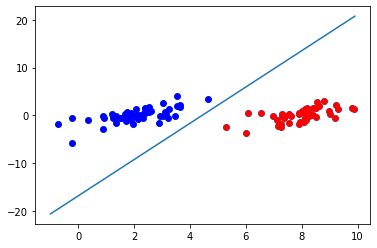

In [22]:
PlotSVM(TrainData,TrainLabel,W,b,alphas)

**径向基函数是SVM中常用的一个核函数。径向基函数是一个采用向量作为自变量的函数，能够基于向量距离输出一个标量。这个距离可以是从<0,0>向量或者其他向量开始计算的距离。接下来，我们将会使用到径向基函数的高斯版本，其具体公式如下：**
$$k(x_1,x_2)=exp(\frac{-{{\Vert}x_1-x_2\Vert}^2}{2\delta^2})$$
其中,$\delta$是用户定义的用于确定达到率或则说函数值跌落到0的速度参数。

**任务八 实现径向基核函数**

函数名：KernelTransform(Data,DataI,Para)  
作用：将数据映射到高纬空间  
参数：  
Data 数据集  
DataI 数据集中的第i行数据  
papa：径向基函数中的$\delta$参数

In [23]:
def KernelTransform(Data,DataI,Para):
    #计算Data的维度 【m,n】
    m,n = shape(Data)
    K = mat(zeros((m,1)))
    ### START THE CODE ###
    Data = mat(Data)
    DataI = mat(DataI)
    K =  exp(np.sum(np.square(Data-DataI),1)*(-1)/(2*Para*Para))                #按照径向基函数公式求取K
    ### END THE CODE ###
    return K

In [24]:
TestData =  [[3.542485, 1.977398], [3.018896, 2.556416], [7.55151, -1.58003], [2.114999, -0.004466], [8.127113, 1.274372]]
TestDataI = [3.018896, 2.556416]
TestPara = 0.8
Result = KernelTransform(TestData,TestDataI,TestPara)
print ("Result = ", Result)

Result =  [[6.21201706e-01]
 [1.00000000e+00]
 [1.67499988e-13]
 [3.14534050e-03]
 [3.88031058e-10]]


输出：  
Result =  [[6.21201706e-01]<br>
 [1.00000000e+00]<br>
 [1.67499988e-13]<br>
 [3.14534050e-03]<br>
 [3.88031058e-10]]

**接下来我们导入KernnelTrainData数据进进行训练，每一行包括两个特征以及一个标签。然后利用SMO算法计算出拉格朗日乘子以及b，利用核函数转换计算K。最后进行预测并计算出预测错误率。**

In [25]:
def TrainAccuracy(TrainFileName,TestFileName,P,C,Toler,MaxIter):
    #导入数据
    Data,Label = LoadData(TrainFileName)

    #高斯核参数
    Para = P
    #转换为mat格式
    Data = mat(Data)
    Label = mat(Label).transpose()

    #计算拉格朗日乘子以及b
    oS = DataOp(Data,Label,C,Toler)
    b,alphas = Smo(oS,MaxIter)

    #获取alpha>0的行数
    UnZero = nonzero(alphas.A > 0)[0]
    SelectData = Data[UnZero]
    SelectLabel = Label[UnZero]
    SelectAlphas = alphas[UnZero]

    #获取Data的维度
    m, n = shape(Data)
    
    #获取测试数据集
    TestData,TestLabel = LoadData(TestFileName)
    TestCount = 0
    
    #转换格式
    TestData = mat(TestData)
    TestLabel = mat(TestLabel).transpose()
    m,n = shape(TestData)
    #遍历测试集每一行数据
    for i in range(m):
        #核函数转换
        K = KernelTransform(SelectData,TestData[i],Para)
        TestPredictValue = K.T*multiply(SelectLabel,SelectAlphas) + b
        #测试准确度
        if sign(TestPredictValue) != sign(TestLabel[i]):
            TestCount += 1
    print("The Test Error Rate is: %.1f%%" % (float(TestCount)*100 / m))
        
        

In [26]:
#训练数据
TrainFileName = 'KernelTrainData.txt'
#测试数据
TestFileName = 'KernelTestData.txt'
#SMO算法参数
C = 210
Toler = 0.0001
MaxIter = 10000
#径向基参数
Para = 0.12
TrainAccuracy(TrainFileName,TestFileName,Para,C,Toler,MaxIter)

The Test Error Rate is: 7.0%


输出：<br>
    The Test Error Rate is: 20.0%

**由以上结果可以看到，应用高斯函数进行SVM分类，我们达到了80左右%的准确率，事实上你可以修改参数，来获得更加优化的模型。**

通过以上的学习，我想你已经对SVM的原理以及和核函数有了一定的了解。

**SVR算法**

传统的回归模型通常直接基于模型输出f(x)与真实输出y之间的差来计算损失，只有当两者完全相同时，损失才为0。而SVR加入了一个ε参数，意为我们可以容忍f(x)与y最多有ε偏差，如下图
![9.png](image/9.PNG)
也就是说，在虚线之间的部分不进行损失计算，他们的损失为0，而只计算虚线以外的点的损失，因此他的对应损失函数为：
![10.png](image/10.png)
对于SVM，可以看作优化问题为：
![11.png](image/11.png)
引入松弛因子$ξ_i$、$ξ_i^*$，SVR的优化问题变为：
![12.png](image/12.png)
其中$h_{w,b}(x)=w^Tx+b$
然后引入拉格朗日乘子,得到对应拉格朗日函数：
$$L(w,b,α,α^*,ξ,ξ^*,r_i,r_i^*)=\frac{1}{2}{\parallel w\parallel}^2+C\sum_{i=0}^{m}(ξ_i+ξ_i^*)-\sum_{i=1}^{m}r_iξ_i-\sum_{i=1}^{m}r_i^*ξ_i^*+\sum_{i=1}^{m}α_i(h_{w,b}(x^i)-y^i-ε-ξ_i)+$$$$\sum_{i=1}^{m}α_i^*(y^i-h_{w,b}(x^i)-ε-ξ_i^*)$$
令函数中对应偏导为0，得到：
![13.png](image/13.png)
代入到拉格朗日函数中得到之关于$α_i$,$α_i^*$的函数，最大化该函数即得到SVR的对偶问题：
![14.png](image/14.png)
可以看出其仍为QP问题，KKT条件为：
![15.png](image/15.png)
因此可以进行求解，同时对于非线性回归也可引入核函数实现。下面实现SVR。

SVR的实现使用scikit-learn库调用实现，scikit-learn库里集成了大量机器学习的常用方法，其中提供了基于libsvm的SVR解决方案。

**任务九 SVR：线性回归实现**

In [27]:
#初始化一系列随机样本
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()  # 将多维数组降为一维

#调用sklearn库，实现LinearSVR
from sklearn.svm import LinearSVR
### START THE CODE ###
svr = LinearSVR(epsilon=0.3)                            #设定epsilon = 0.3,方便观察效果，支持向量均位于容忍区域外侧
svr.fit(X,y)                            #根据相关文档得到拟合模型
### END THE CODE  ###

#找到支持向量
def find_support(svr,X,y):
    y_pred=svr.predict(X)#计算预测值
    margin=(np.abs(y-y_pred) >= svr.epsilon)#判断是否为支持向量
    return np.argwhere(margin)

svr.support_=find_support(svr,X,y)#获取对应的支持向量对应下标，注意将变量名改为你自己的命名
    

绘制SVR结果

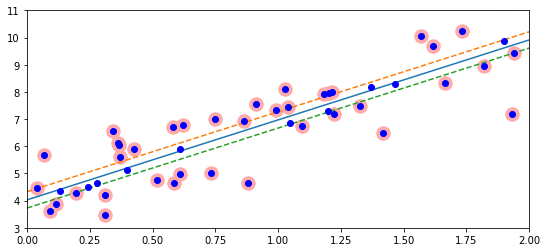

In [28]:

def plot_svr(svr,X,y,axes):
    xls=np.linspace(axes[0],axes[1],100).reshape(100,1)
    y_pred=svr.predict(xls)
    plt.plot(xls, y_pred, "-")
    plt.plot(xls, y_pred + svr.epsilon, "--")  
    plt.plot(xls, y_pred - svr.epsilon, "--")
    plt.plot(X, y, "bo")
    plt.scatter(X[svr.support_], y[svr.support_], s=180, facecolors='#FFAAAA')
    plt.axis(axes)
plt.figure(figsize=(9, 4))  # width, height in inches
plot_svr(svr, X, y, [0, 2, 3, 11]) #注意第一个参数改为自己的命名

通过观察图像可以看出，SVR中的支持向量均位于容忍区域外侧

**任务十 SVR：非线性回归**<br>
非线性回归中，参数C越大，对错样本的惩罚程度越大，正则化项的作用会越小，模型越趋向于过拟合。
反之，C越小，正则化效果越强，模型会更简单。
在实验中同学们可以通过调整C参数观察回归结果的不同。

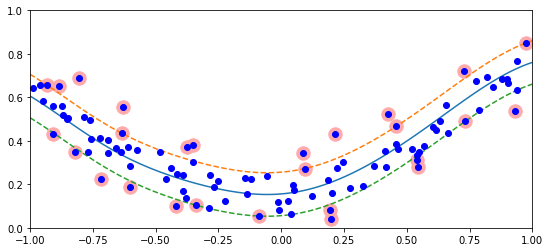

In [29]:
#初始化随机样本
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()
#实现SVR
from sklearn.svm import SVR

### START THE CODE ###
svr_poly = SVR(C=4)                        #对初始化参数C进行调节观察结果
svr_poly.fit(X,y)                       #拟合模型 
### END THE CODE  ###

plt.figure(figsize=(9, 4))
plot_svr(svr_poly, X, y, [-1, 1, 0, 1])

对应此数据集，通过改变C参数可以看出C越小，图像弯曲程度越小，而C越大图像越弯曲，对此数据拟合效果越好。